This code is for generating continuous distributions

IMPORTING THE REQUIRED LIBRARIES

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [19]:
import matplotlib.pyplot as plt

DEFINING THE GENERATOR AND DISCRIMINATOR MODEL ARCHITECTURE

In [20]:
# Define the Generator network
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(10,), activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    # model.add(layers.Dense(1024, activation='relu'))
    # model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(400, activation='exponential'))
    return model

In [21]:
# Define the Discriminator network
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(400,), activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

DEFINING THE GENERATOR AND DISCRIMINATOR LOSS

In [23]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


def generator_loss(fake_output, generated_sequences):
    standard_gan_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    return standard_gan_loss


OPTIMIZERS FOR GENERATOR AND DISCRIMINATOR

In [24]:
generator_optimizer = tf.keras.optimizers.legacy.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.legacy.Adam(1e-4)

TRAINING STEP

In [25]:
# Define the training function
@tf.function
def train_step(real_sequences):

    # Generating the latent noise
    noise = tf.random.normal([real_sequences.shape[0], 10])

    # Generating sequences and calculating loss
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_sequences = generator(noise, training=True)

        real_output = discriminator(real_sequences, training=True)
        fake_output = discriminator(generated_sequences, training=True)

        gen_loss = generator_loss(fake_output, generated_sequences)
        disc_loss = discriminator_loss(real_output, fake_output)

    # Calculating the gradients for generator and discriminator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Updating the generator and discriminator
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [26]:
# Define the number of training epochs and batch size
num_epochs = 1000
batch_size = 100

In [28]:
scale = 1
array = np.random.exponential(scale, 2000000)
# Input Data

PLOTTING THE INPUT DATA

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0., 190233., 171480., 156674.,
        140528., 127371., 115330., 104418.,  94692.,  85801.,  77532.,
         69869.,  62878.,  57375.,  51838.,  47457.,  42286.,  38845.,
         34982.,  31692.,  28276.,  25655.,  23242.,  20805.,  19211.,
         17397.,  15672.,  14126.,  12751.,  11553.,  10535.,   9530.,
          8626.,   7657.,   7068.,   6321.,   5723.,   5278.,   4620.,
      

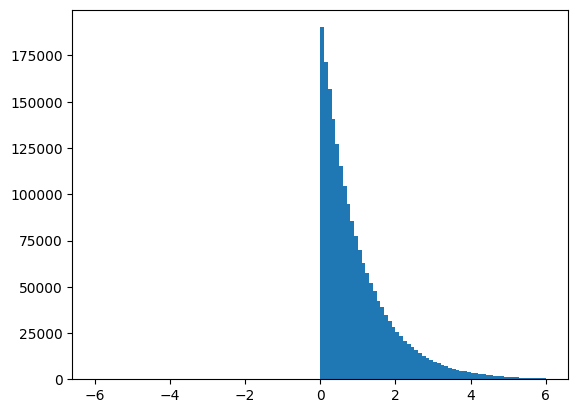

In [29]:
bin_size = 0.1
bins = np.arange(-6, 6 + bin_size, bin_size)
plt.hist(array, bins=bins)

In [30]:
training_data = array.reshape(5000, 400)
train_dataset = tf.data.Dataset.from_tensor_slices(training_data).shuffle(len(training_data)).batch(batch_size)


MAKING (INITIALIZING) THE GENERATOR AND DISCRIMINATOR MODELS

In [31]:
# Instantiate the Generator and Discriminator models
generator = make_generator_model()
discriminator = make_discriminator_model()

In [32]:
store = np.zeros((10, 400000))

TRAINING OCCURS HERE

In [33]:

# Training loop
for epoch in range(num_epochs):
    for sequences in train_dataset:
        train_step(sequences)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs} completed.")
        
    if (epoch + 1) % 100 == 0:
        
        val = (epoch+1)/100 - 1
        for q in range(1000):
            noise = tf.random.uniform([1, 10])
            xx = generator(noise, training=False).numpy().squeeze()
    
            for p in range(400):
                store[int(val)][int(q*400 + p)] = xx[p]




Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 10/1000 completed.
Epoch 20/1000 completed.
Epoch 30/1000 completed.
Epoch 40/1000 completed.
Epoch 50/1000 completed.
Epoch 60/1000 completed.
Epoch 70/1000 completed.
Epoch 80/1000 completed.
Epoch 90/1000 completed.
Epoch 100/1000 completed.
Epoch 110/1000 completed.
Epoch 120/1000 completed.
Epoch 130/1000 completed.
Epoch 140/1000 completed.
Epoch 150/1000 completed.
Epoch 160/100

PLOTTING THE GENERATED HISTOGRAMS AFTER 100, 200.... 1000 epochs

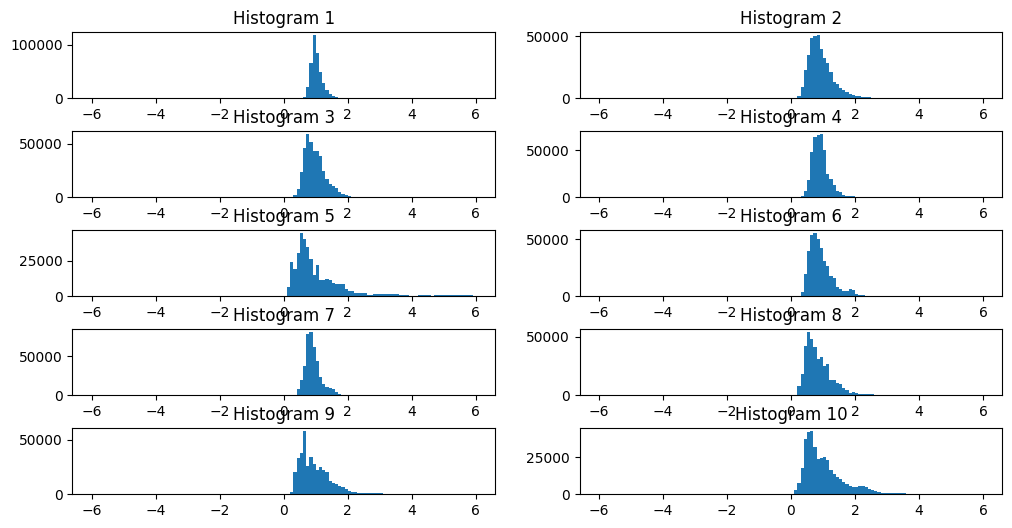

In [34]:
fig, axs = plt.subplots(5, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5) 

# Iterate through the subplots
for i, ax in enumerate(axs.flat):
    bin_size = 0.1
    bins = np.arange(-6, 6 + bin_size, bin_size)
    
    # Plot the histogram in the current subplot
    ax.hist(store[i], bins=bins)
    
    # Set titles for each subplot
    ax.set_title(f'Histogram {i+1}')
    


# Show the plots
plt.show()